## 1. Importing the necessary dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.io as plio
plio.templates
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor 

import joblib

## 2. Exploring the dataset

In [2]:
data = pd.read_csv('advertising.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


### Removing the unnecessary column Unnamed: 0

In [3]:
data.drop('Unnamed: 0', axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
data.duplicated().sum() # Check for duplicates

0

### Correlation plot to visualize the impact of each feature on target(sales)

<Axes: >

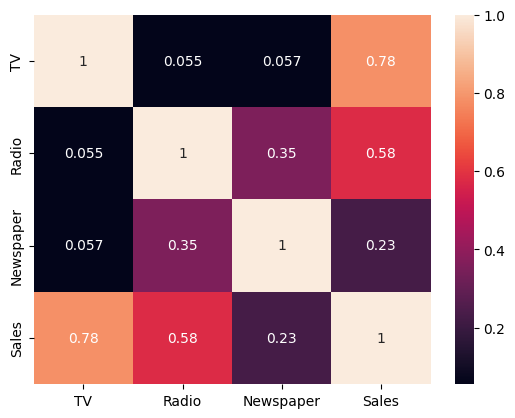

In [5]:
sns.heatmap(data.corr(),annot=True)

##### From the above correlation plot we have feature: -
##### 1. 'TV' having an impact score of 0.78 on Sales
##### 2. 'Radio' having an impact score of 0.58 on Sales
##### 3. 'Newspaper' having an impact score of 0.23 on Sales

### [A]Plotly Scatterplot of TV(feature) vs Sales(Target)

In [6]:
# Create a scatter plot
fig = go.Figure(data=go.Scatter(x=data['TV'], y=data['Sales'], mode='markers', marker=dict(color='orange', size=8)))

# Customize the layout
fig.update_layout(
    title="Scatter Plot of TV(Feature) vs Sales(Target)",
    xaxis_title="TV",
    yaxis_title="Sales"
)

# Show the plot
fig.show()

##### From the above scatterplot we can infer that 
##### As the score of TV is increasing score of Sales is also increasing

### [B]Plotly Scatterplot of Radio(feature) vs Sales(Target)

In [7]:
# Create a scatter plot
fig = go.Figure(data=go.Scatter(x=data['Radio'], y=data['Sales'], mode='markers', marker=dict(color='red', size=8)))

# Customize the layout
fig.update_layout(
    title="Scatter Plot of Radio(Feature) vs Sales(Target)",
    xaxis_title="Radio",
    yaxis_title="Sales"
)

# Show the plot
fig.show()

##### From the above scatterplot we can infer that 
##### As the score of Radio is increasing score of Sales is also increasing

### [C]Plotly Scatterplot of Newspaper(feature) vs Sales(Target)

In [8]:
# Create a scatter plot
fig = go.Figure(data=go.Scatter(x=data['Newspaper'], y=data['Sales'], mode='markers', marker=dict(color='blue', size=8)))

# Customize the layout
fig.update_layout(
    title="Scatter Plot of Newspaper(Feature) vs Sales(Target)",
    xaxis_title="Newspaper",
    yaxis_title="Sales"
)

# Show the plot
fig.show()

#### [i] Distribution of TV feature

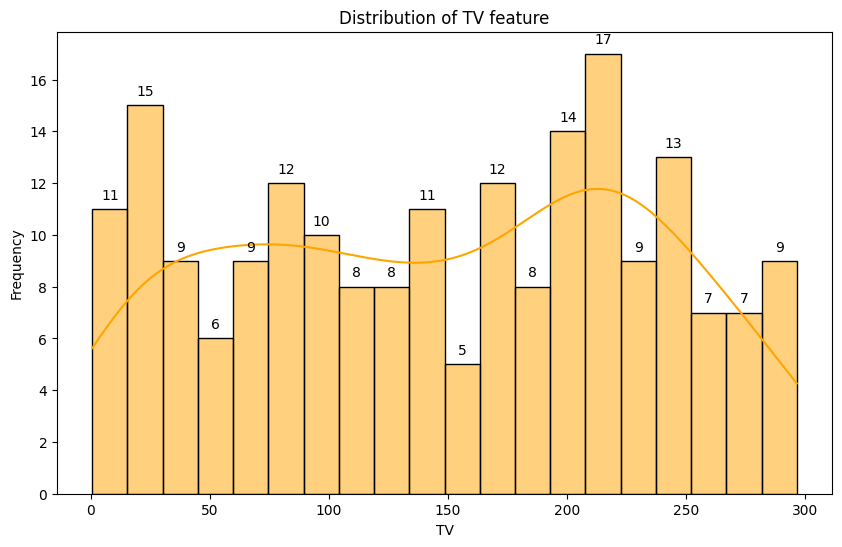

In [9]:
plt.figure(figsize=(10, 6))
ax = sns.histplot(data['TV'], bins=20, kde=True, color='orange')
plt.xlabel('TV')
plt.ylabel('Frequency')
plt.title('Distribution of TV feature')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                textcoords='offset points')
plt.show()

#### [ii] Distribution of Radio feature

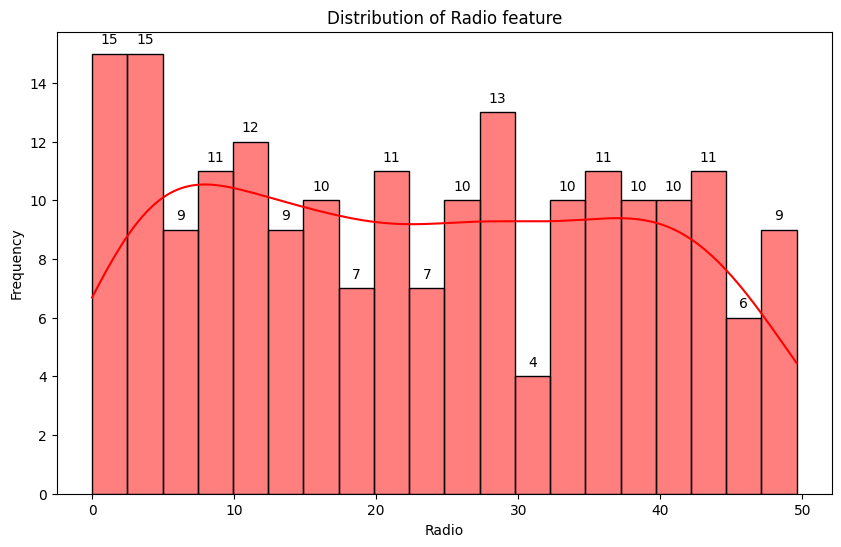

In [10]:
plt.figure(figsize=(10, 6))
ax = sns.histplot(data['Radio'], bins=20, kde=True, color='red')
plt.xlabel('Radio')
plt.ylabel('Frequency')
plt.title('Distribution of Radio feature')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                textcoords='offset points')
plt.show()

#### [iii] Distribution of Newspaper feature

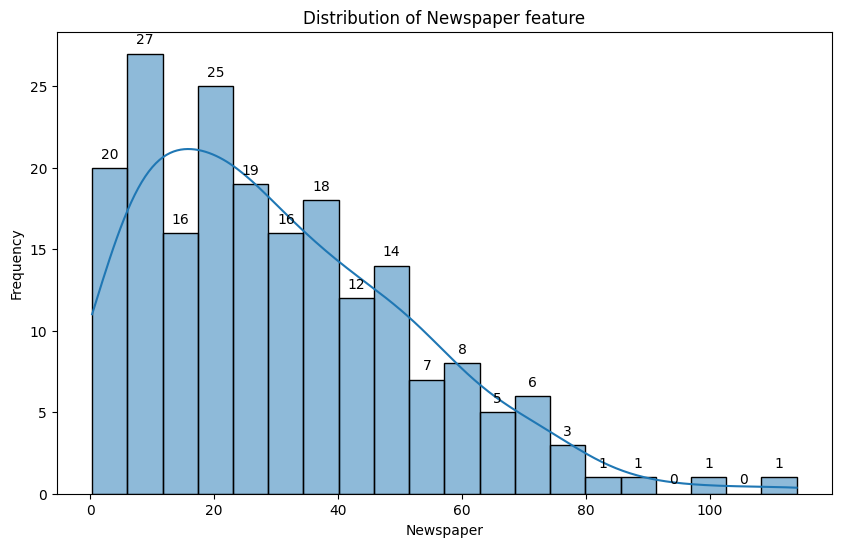

In [11]:
plt.figure(figsize=(10, 6))
ax = sns.histplot(data['Newspaper'], bins=20, kde=True)
plt.xlabel('Newspaper')
plt.ylabel('Frequency')
plt.title('Distribution of Newspaper feature')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                textcoords='offset points')
plt.show()

#### [iv] Distribution of Sales

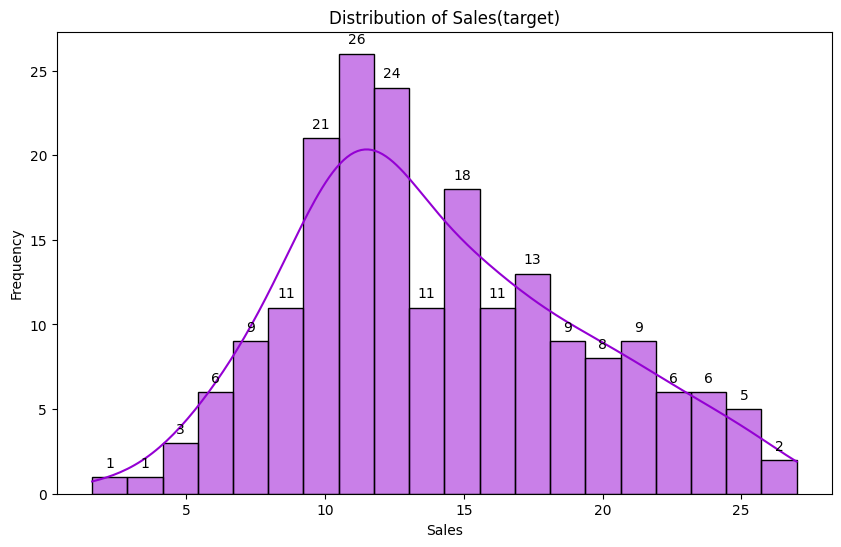

In [12]:
plt.figure(figsize=(10, 6))
ax = sns.histplot(data['Sales'], bins=20, kde=True, color='darkviolet')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Distribution of Sales(target)')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                textcoords='offset points')
plt.show()

### 3. Preparing data for Training (Data Modelling)

##### Since, we need to predict the Sales using different features of the dataset
##### We consider Sales as a seperate dataset say 'y' and all other features as 'x'

In [13]:
x = data.iloc[:,:3]
y = data.iloc[:,3:]

In [14]:
print(x.head())

      TV  Radio  Newspaper
0  230.1   37.8       69.2
1   44.5   39.3       45.1
2   17.2   45.9       69.3
3  151.5   41.3       58.5
4  180.8   10.8       58.4


In [15]:
print(y.head())

   Sales
0   22.1
1   10.4
2    9.3
3   18.5
4   12.9


In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

### 4.Training Models using the above data

#### [A] Linear Regression Model

In [17]:
model_1 = LinearRegression()
model_1.fit(x_train, y_train)
y_pred_1 = model_1.predict(x_test)

In [18]:
mse = mean_squared_error(y_test, y_pred_1)
r2 = r2_score(y_test, y_pred_1)
print("Mean Square Error is :", mse)
print("R-Squared score is :",r2)

Mean Square Error is : 2.270137441914188
R-Squared score is : 0.9144554897064837


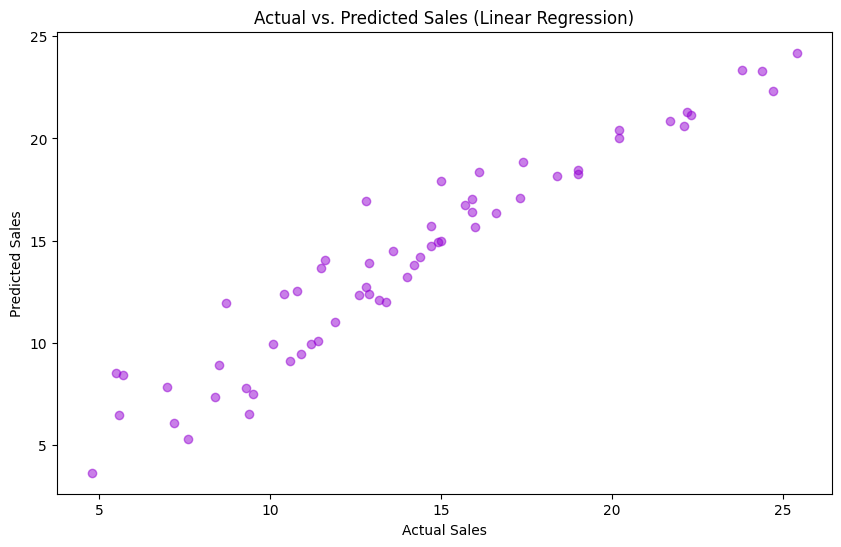

In [19]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_1, alpha=0.5, color='darkviolet')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales (Linear Regression)')
plt.show()

#### [B] Random Forest Regression Model

In [20]:
model_2 = RandomForestRegressor() 
model_2.fit(x_train, y_train) 
y_pred_2 = model_2.predict(x_test)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1351: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



In [21]:
mse = mean_squared_error(y_test, y_pred_2)
r2 = r2_score(y_test, y_pred_2)
print("Mean Square Error is :", mse)
print("R-Squared score is :",r2)

Mean Square Error is : 0.608025249999998
R-Squared score is : 0.9770880734809233


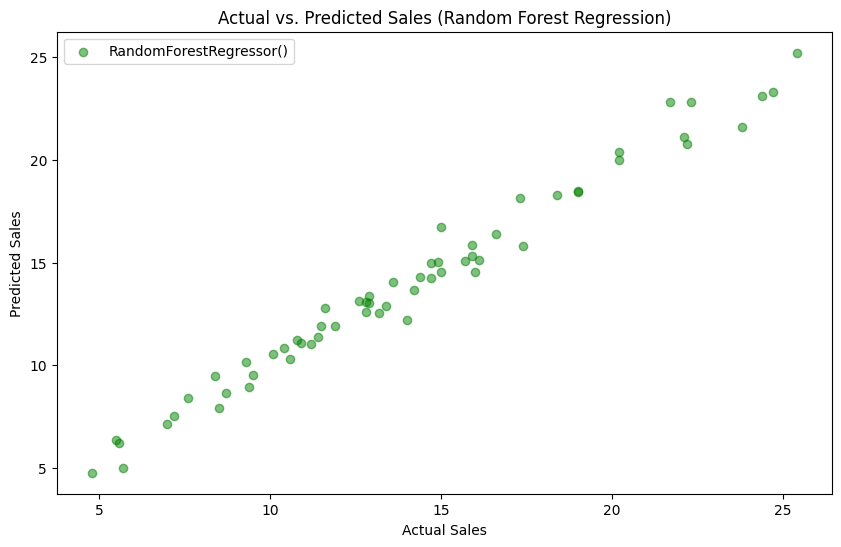

In [22]:
plt.figure(figsize=(10, 6))

plt.scatter(y_test, y_pred_2, label=model_2, alpha=0.5, color='green')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales (Random Forest Regression)')

plt.legend()
plt.show()

#### [C] Ridge Regression Model

In [23]:
model_3 = Ridge() 
model_3.fit(x_train, y_train) 
y_pred_3 = model_3.predict(x_test)

In [24]:
mse = mean_squared_error(y_test, y_pred_3)
r2 = r2_score(y_test, y_pred_3)
print("Mean Square Error is :", mse)
print("R-Squared score is :",r2)

Mean Square Error is : 2.2701128226165808
R-Squared score is : 0.9144564174237746


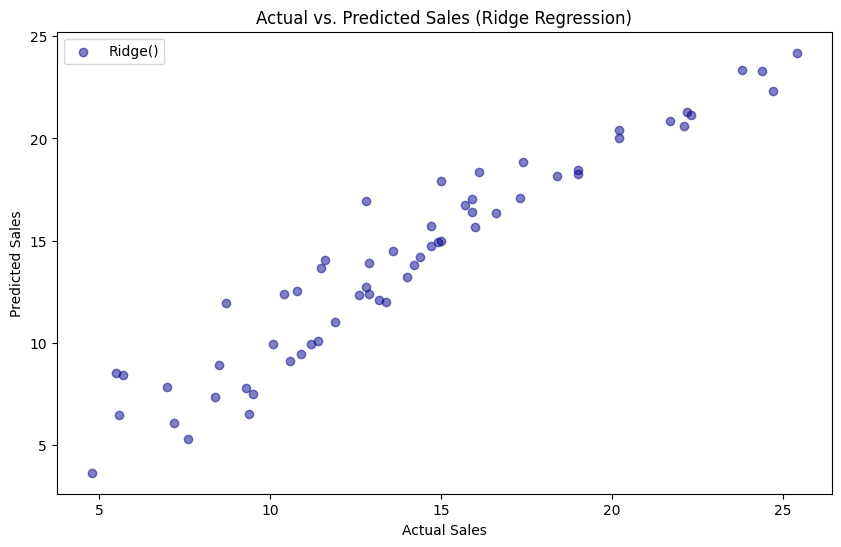

In [25]:
plt.figure(figsize=(10, 6))

plt.scatter(y_test, y_pred_3, label=model_3, alpha=0.5, color='darkblue')

plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales (Ridge Regression)')
plt.legend()
plt.show()

#### [D] Decision Tree

In [26]:
model_4 = DecisionTreeRegressor()
model_4.fit(x_train, y_train)
y_pred_4 = model_4.predict(x_test)

In [27]:
mse = mean_squared_error(y_test, y_pred_4)
r2 = r2_score(y_test, y_pred_4)
print("Mean Square Error is :", mse)
print("R-Squared score is :",r2)

Mean Square Error is : 1.5141666666666664
R-Squared score is : 0.9429423771392683


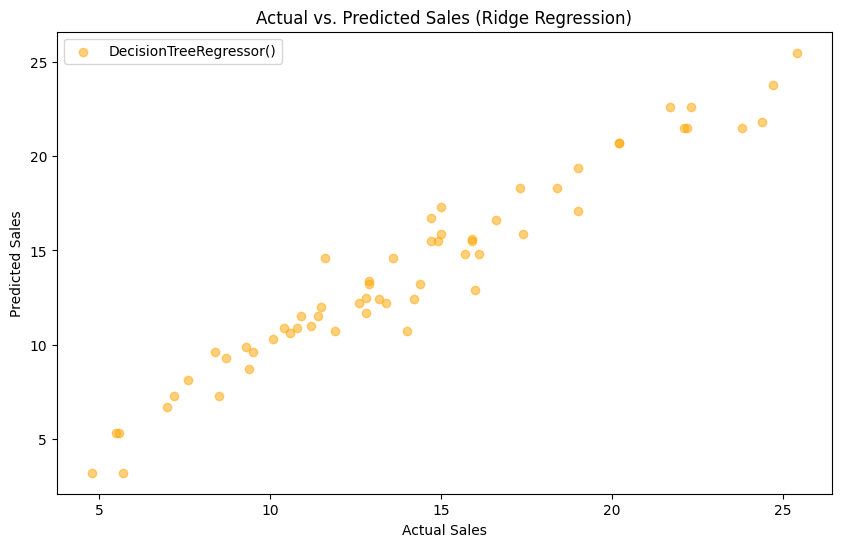

In [28]:
plt.figure(figsize=(10, 6))

plt.scatter(y_test, y_pred_4, label=model_4, alpha=0.5, color='orange')

plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales (Ridge Regression)')
plt.legend()
plt.show()

#### Model r^2 scores of each regression model

In [29]:
model_r2_scores = {
     "Linear Regression Model":  r2_score(y_test, y_pred_1),

     "Random Forest Regression Model":  r2_score(y_test, y_pred_2),

     "Ridge Regression Model":  r2_score(y_test, y_pred_3),

     "Decision Tree":  r2_score(y_test, y_pred_4),
}

model_r2_scores

{'Linear Regression Model': 0.9144554897064837,
 'Random Forest Regression Model': 0.9770880734809233,
 'Ridge Regression Model': 0.9144564174237746,
 'Decision Tree': 0.9429423771392683}

In [30]:
best_model_name = max(model_r2_scores, key=model_r2_scores.get)
best_r2_score = model_r2_scores[best_model_name]

print(f"Best Performing Model is {best_model_name} with an R^2 score of {best_r2_score}")

Best Performing Model is Random Forest Regression Model with an R^2 score of 0.9770880734809233


### 5. Saving the Model having the best fit

In [31]:
final_model = model_2
joblib.dump(final_model, 'random_forest_regressor.pkl')

['random_forest_regressor.pkl']

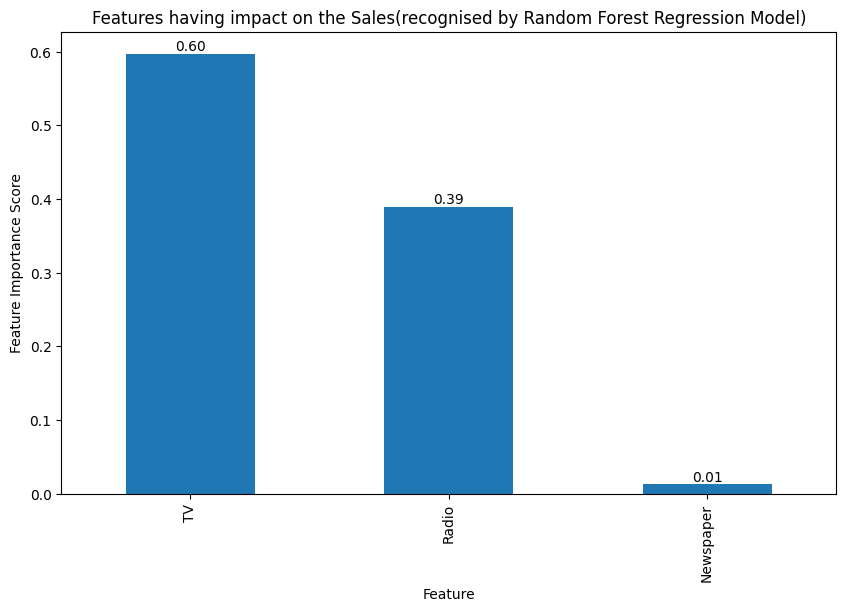

In [32]:
feature_importances = pd.Series(final_model.feature_importances_, index=x.columns)
plt.figure(figsize=(10, 6))
features = feature_importances
features.plot(kind='bar')
plt.xlabel('Feature')
plt.ylabel('Feature Importance Score')
plt.title('Features having impact on the Sales(recognised by Random Forest Regression Model)')
for index, value in enumerate(features):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')
plt.show()